#Import Library

In [1]:
#library data processing
import pandas as pd
import numpy as np

#library data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st

#Read the Dataset

In [2]:
df=pd.read_csv('marketing_campaign.csv',sep='\t') #command after coma means to read csv data correctly

In [3]:
df.shape

(2240, 29)

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [63]:
#mengetahui jumlah data untuk masing-masing kategori education
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [6]:
#menampilkan 5 data pertama
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
#menampilkan 5 data terakhir
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


#Data Cleaning

1. Crosscheck the missing value

In [9]:
#mengecek jumlah missing value pada data
df.isna().sum() 

#result says 24 for income, means there are 24 data in income which  blank

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

2. Data Cleaning

In [37]:
#mengisi missing value dengan nilai median
df['Income']=df['Income'].fillna(df['Income'].median()) 
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [46]:
#crosschecking, the missing value is there or not
df.isna().sum() 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

After cleaning the data and we crosscheck again, the data is already clean and ready to be run

#Descriptive Statistics Analysis

1. Generate variables

In [11]:
#Generate variables
df_Graduation=df[df['Education']=='Graduation']    
df_Master=df[df['Education']=='Master']
df_PhD=df[df['Education']=='PhD']
df_2nCycle=df[df['Education']=='2n Cycle']
df_Basic=df[df['Education']=='Basic']

2. Read the central tendency of the data (mean, median, and mode)

In [24]:
#Membaca mean income kategori pendidikan Graduation
avg_Graduation=df_Graduation['Income'].mean()
print(avg_Graduation)

52707.30567879326


In [23]:
#Membaca mean income kategori pendidikan PhD
avg_PhD=df_PhD['Income'].mean()
print(avg_PhD)

56096.30349794239


In [25]:
#Membaca mean income kategori pendidikan Master
avg_Master=df_Master['Income'].mean()
print(avg_Master)

52896.77702702703


In [26]:
#Membaca mean income kategori pendidikan 2n Cycle
avg_2nCycle=df_2nCycle['Income'].mean()
print(avg_2nCycle)

47688.58374384236


In [27]:
#Membaca mean income kategori pendidikan Basic
avg_Basic=df_Basic['Income'].mean()
print(avg_Basic)

20306.25925925926


In [28]:
#Membaca perbedaan mean income kategori pendidikan paling tinggi dengan kategori pendidikan paling rendah
diff_avg_income=avg_PhD-avg_Basic
print(diff_avg_income)

35790.04423868313


Interpretasi: 

- Rata-rata income pada kelompok pendidikan Graduation adalah sebesar 52707.30567879326
- Rata-rata income pada kelompok pendidikan PhD adalah sebesar 56096.30349794239
- Rata-rata income pada kelompok pendidikan Master  adalah sebesar 52896.77702702703
- Rata-rata income pada kelompok pendidikan 2n Cycle adalah sebesar 47688.58374384236
- Rata-rata income pada kelompok pendidikan Basic adalah sebesar 20306.25925925926
- Selisih rata-rata income antara kategori pendidikan paling tinggi (PhD) dengan pendidika paling rendah (Basic) adalah sebesar 35790.04423868313.
Hal ini menunjukkan bahwa terdapat perbedaan income yang cukup signifikan berdasarkan kategori pendidikan

In [31]:
#Membaca modus kategory pendidikan Graduation
mode_Graduation=df_Graduation['Income'].mode()
print(mode_Graduation)

0    51381.5
dtype: float64


In [30]:
#Membaca modus kategory pendidikan PhD
mode_PhD=df_PhD['Income'].mode()
print(mode_PhD)

0    51381.5
dtype: float64


In [32]:
#Membaca modus kategory pendidikan Master
mode_Master=df_Master['Income'].mode()
print(mode_Master)

0    51381.5
dtype: float64


In [33]:
#Membaca modus kategory pendidikan PhD
mode_2nCycle=df_2nCycle['Income'].mode()
print(mode_2nCycle)

0    7500.0
dtype: float64


In [35]:
#Membaca modus kategory pendidikan PhD
mode_Basic=df_Basic['Income'].mode()
print(mode_Basic)

0     7500.0
1    20425.0
2    22634.0
3    24594.0
4    24882.0
5    28249.0
dtype: float64


Interpretasi:

- Pada kategori pendidikan Graduation, PhD, dan Master, nilai income yang sering keluar pada data adalah 51381.5
- Pada kategori pendidikan 2n Cycle, nilai income yang sering keluar pada data adalah 7500
-Pada kategori pendidikan Basic, nilai income yang sering keluar pada data adalah 7500,20425,22634,24594,24882, dan 28249

In [41]:
#membaca median kategory pendidikan Graduation
med_Graduation=df_Graduation['Income'].median()
print(med_Graduation)

51651.0


In [42]:
#membaca median kategory pendidikan Master
med_Master=df_Master['Income'].median()
print(med_Master)

51044.5


In [43]:
#membaca median kategory pendidikan PhD
med_PhD=df_PhD['Income'].median()
print(med_PhD)

55005.0


In [44]:
#membaca median kategory pendidikan 2n Cycle
med_2nCycle=df_2nCycle['Income'].median()
print(med_2nCycle)

46891.0


In [45]:
#membaca median kategory pendidikan Basic
med_Basic=df_Basic['Income'].median()
print(med_Basic)

20744.0


Interpretasi:

- Nilai tengah income pada kategori pendidikan Graduate adalah sebesar 51651.0
- Nilai tengah income pada kategori pendidikan Master adalah sebesar 51044.0
- Nilai tengah income pada kategori pendidikan PhD adalah sebesar 55005.0
- Nilai tengah income pada kategori pendidikan 2n Cycle adalah sebesar 46891.0
- Nilai tengah income pada kategori pendidikan Basic adalah sebesar 20744.0

3. Read the Data Spread

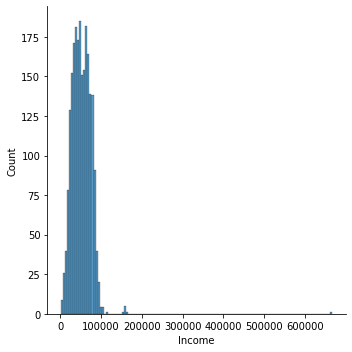

In [51]:
#Membaca penyebaran data pelanggan berdasarkan income menggunakan plot
sns.displot(df['Income'])

Interpretasi:

Penyebaran data income terdistribusi secara normal dan terdapat beberapa outlier.

Berdasarkan grafik income, sebagian besar pelanggan memiliki dengan jangkauan income sekitar pada angka 30000-800000

In [55]:
#Membaca penyebaran data pelanggan berdasarkan Income menggunakan std deviasi
Income_std=df['Income'].std()
Income_std

25037.955890621957

Interpretasi:

Bahwa nilai income terbanyak berada diantara pada jangkauan 25037.955890621957 dari nilai rata-ratanya

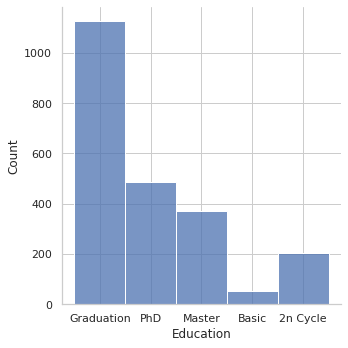

In [68]:
#Membaca penyebaran data pelanggan berdasarkan Education

sns.displot(df['Education'])

Interpretasi:

Sebagian besar pelanggan memiliki background pendidikan Graduation, kemudian jumlah pelanggan terbesar kedua memiliki bacground pendidikan PhD.

#Hypothesis Testing

Question:

Apakah rata-rata income kelima kategori education, yaitu Graduation, Master, PhD, Basic, dan 2n Cycle memiliki perbedaan income yang cukup signifikan?

H0: Average income of five categories of education (Graduation, Master, PhD, Basic, dan 2n Cycle) is not different

H1: Average income of five categories of education (Graduation, Master, PhD, Basic, dan 2n Cycle) is different

2. Define hypothesis

In [70]:
df_H0=['Do not reject H0. Average income of education level is not different']
df_H1=['Reject H0. Average income of education level is different']

3. Hypothesis Testing with ANOVA

We use ANOVA testing because we address to compare more tha two groups at the same time wether the relationships exists between them

In [69]:
anova_test=st.f_oneway(df_Graduation['Income'], 
                       df_Master['Income'],
                       df_PhD['Income'],
                       df_2nCycle['Income'],
                       df_Basic['Income'])

In [71]:
anova_test 

F_onewayResult(statistic=27.966517368411708, pvalue=1.075202108156874e-22)

In [72]:
#Call the result of ANOVA Test
if anova_test.pvalue>0.05:   
  print(df_H0)
else:
  print(df_H1)

['Reject H0. Average income of education level is different']


#Analysis

Result:

P-value=1.075202108156874e-22

Alfa = 0.05

P-value < Alfa, it means reject H0 which is average income of education level is different.

Ada cukup bukti bahwa level pendidikan memiliki dampak signifikan terhadap income.



#Conclusion

- Berdasarkan penyebaran data, sebagian besar pelanggan memiliki background pendidikan Graduation.
- Education memiliki dampak yang cukup signifikan terhadap income.
- Hal ini berarti, semakin tinggi Education level, maka semakin tinggi pula income, sehingga keinginan pelanggan untuk membeli barang semakin tinggi.

#Recommendation

- Berdasarkan hasil analisis tersebut, informasi ini dapat digunakan untuk melakukan perencanaan pada stategi pemasaran perusahaan. Dimana untuk saat ini, strategi pemasaran dapat difokuskan pada kelompok pendapatan tinggi.